# Linear Regression in StatsModels - Lab

## Introduction

It's time to apply the StatsModels skills from the previous lesson! In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:

* Perform a linear regression using StatsModels
* Evaluate a linear regression model using StatsModels
* Interpret linear regression coefficients using StatsModels

## Let's Get Started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

The columns in this dataset are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

## Step 1: Exploratory Data Analysis

In [ ]:
!pip install numpy==1.23.5
!pip install statsmodels==0.13.2

In [1]:
# Load necessary libraries and import the data
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('advertising.csv')

In [2]:
# Check the columns and first few rows
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
# Generate summary statistics for data with .describe()
print(df.describe())


       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


Based on what you have seen so far, describe the contents of this dataset. Remember that our business problem is asking us to build a model that predicts sales.

In [4]:
# It doesn't look like we are missing any data (all vars are at 200)

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from `head()`.
    
</details>

Now, use scatter plots to plot each predictor (TV, radio, newspaper) against the target variable.

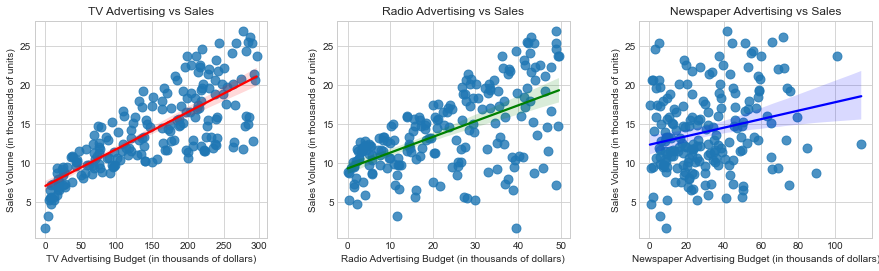

In [6]:
# Visualize the relationship between the preditors and the target using scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot each predictor against the target variable
sns.regplot(x=df['TV'], y=df['sales'], ax=axes[0], scatter_kws={'s': 80}, line_kws={'color': 'r'})
axes[0].set_title('TV Advertising vs Sales')
axes[0].set_xlabel('TV Advertising Budget (in thousands of dollars)')
axes[0].set_ylabel('Sales Volume (in thousands of units)')

sns.regplot(x=df['radio'], y=df['sales'], ax=axes[1], scatter_kws={'s': 80}, line_kws={'color': 'g'})
axes[1].set_title('Radio Advertising vs Sales')
axes[1].set_xlabel('Radio Advertising Budget (in thousands of dollars)')
axes[1].set_ylabel('Sales Volume (in thousands of units)')

sns.regplot(x=df['newspaper'], y=df['sales'], ax=axes[2], scatter_kws={'s': 80}, line_kws={'color': 'b'})
axes[2].set_title('Newspaper Advertising vs Sales')
axes[2].set_xlabel('Newspaper Advertising Budget (in thousands of dollars)')
axes[2].set_ylabel('Sales Volume (in thousands of units)')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

Does there appear to be a linear relationship between these predictors and the target?

In [7]:
# TV advertising seems to have the best linear relationship with Sales. Radio is also not bad, but has mor variance

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

`TV` seems to be a good predictor because it has the most linear relationship with sales.

`radio` also seems to have a linear relationship, but there is more variance than with `TV`. We would expect a model using `radio` to be able to predict the target, but not as well as a model using `TV`.

`newspaper` has the least linear-looking relationship. There is a lot of variance as well. It's not clear from this plot whether a model using `newspaper` would be able to predict the target.
    
</details>

## Step 2: Run a Simple Linear Regression with `TV` as the Predictor

As the analysis above indicates, `TV` looks like it has the strongest relationship with `sales`. Let's attempt to quantify that using linear regression.

In [8]:
# Import libraries
import statsmodels.api as sm
import pandas as pd

# Determine X and y values
X = df[['TV']]
y = df['sales']

# Create an OLS model
model = sm.OLS(y, X).fit()


In [9]:
# Get model results
print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                   3.52e-100
Time:                        16:13:40   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Step 3: Evaluate and Interpret Results from Step 2

How does this model perform overall? What do the coefficients say about the relationship between the variables?

In [10]:
# High R-squared of 0.897 - meaning about 90% of the data is being explained by the TV spending.
# the p-value for TV is also very close to 0 -indicating that it is statistically significant. 
# The coefficient for TV is 0.0832, which means that for every $1,000 increase in the TV advertising budget, 
#  the sales volume is expected to increase by approximately 83.2 units

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Overall the model and coefficients are **statistically significant**, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.61 i.e. **61% of the variance in the target variable can be explained by TV spending**.

The intercept is about 7.0, meaning that if we spent 0 on TV, we would expect sales of about 7k widgets (the units of `sales` are in thousands of widgets).

The `TV` coefficient is about 0.05, meaning that **for each additional &dollar;1k spent on TV (the units of `TV` are in thousands of dollars), we would expect to sell an additional 50 widgets**. (More precisely, 47.5 widgets.)

Note that all of these coefficients represent associations rather than causation. It's possible that better sales are what leads to more TV spending! Either way, `TV` seems to have a strong relationship with `sales`.

</details>

## Step 4: Visualize Model with `TV` as Predictor

Create at least one visualization that shows the prediction line against a scatter plot of `TV` vs. sales, as well as at least one visualization that shows the residuals.

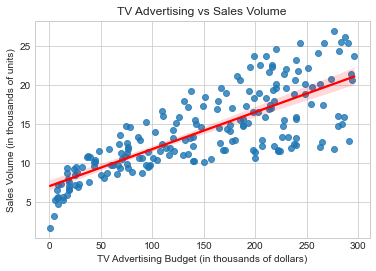

In [12]:
# Plot the model fit (scatter plot and regression line)
sns.regplot(x=df['TV'], y=df['sales'], data=df, line_kws={'color': 'r'})
plt.title('TV Advertising vs Sales Volume')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales Volume (in thousands of units)')
plt.show()

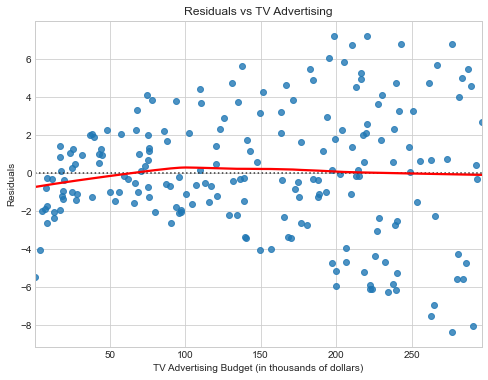

In [13]:
# Plot the residuals
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=df['TV'], y='sales', data=df, lowess=True, line_kws={'color': 'r'})
plt.title('Residuals vs TV Advertising')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Residuals')
plt.show()

## Step 5: Repeat Steps 2-4 with `radio` as Predictor

Compare and contrast the model performance, coefficient value, etc. The goal is to answer the business question described above.

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              834.0
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                    4.27e-73
Time:                        16:18:02   Log-Likelihood:                         -660.13
No. Observations:                 200   AIC:                                      1322.
Df Residuals:                     199   BIC:                                      1326.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

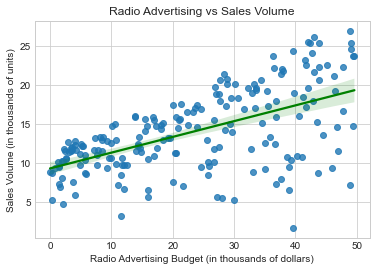

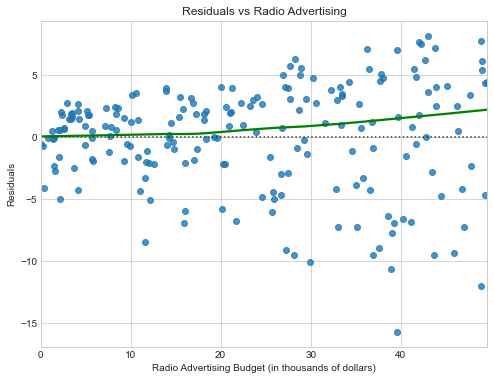

In [15]:
# Run model with radio as predictor
X = df[['radio']]
y = df['sales']
radio_model = sm.OLS(y, X).fit()
print(radio_model.summary())

# Visualize model fit
sns.regplot(x=df['radio'], y=df['sales'], data=df, line_kws={'color': 'g'})
plt.title('Radio Advertising vs Sales Volume')
plt.xlabel('Radio Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales Volume (in thousands of units)')
plt.show()

# Visualize residuals
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=df['radio'], y='sales', data=df, lowess=True, line_kws={'color': 'g'})
plt.title('Residuals vs Radio Advertising')
plt.xlabel('Radio Advertising Budget (in thousands of dollars)')
plt.ylabel('Residuals')
plt.show()

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Same as with `TV`, the model using `radio` to predict `sales` as well as its parameters are **statistically significant** (p-values well below 0.05).

However, this model explains less of the variance. It only **explains about 33% of the variance in `sales`**, compared to about 61% explained by `TV`. If our main focus is the percentage of variance explained, this is a worse model than the `TV` model.

On the other hand, the coefficient for `radio` is much higher. **An increase of &dollar;1k in radio spending is associated with an increase of sales of about 200 widgets!** This is roughly 4x the increase of widget sales that we see for `TV`.

Visualizing this model, it doesn't look much different from the `TV` model.
    
So, how should we answer the business question? Realistically, you would need to return to your stakeholders to get a better understanding of what they are looking for. Do they care more about the variable that explains more variance, or do they care more about where an extra &dollar;1k of advertising spending is likely to make the most difference?

</details>

## Step 6: Repeat Steps 2-4 with `newspaper` as Predictor

Once again, use this information to compare and contrast.

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              379.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                    4.98e-48
Time:                        16:18:30   Log-Likelihood:                         -718.04
No. Observations:                 200   AIC:                                      1438.
Df Residuals:                     199   BIC:                                      1441.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

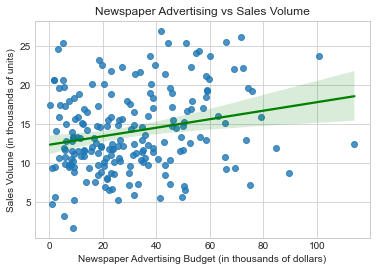

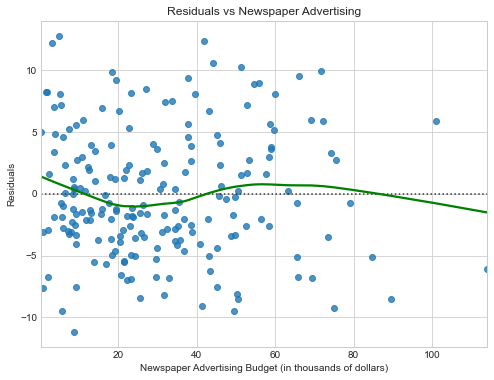

In [16]:
# Run model with radio as predictor
X = df[['newspaper']]
y = df['sales']
radio_model = sm.OLS(y, X).fit()
print(radio_model.summary())

# Visualize model fit
sns.regplot(x=df['newspaper'], y=df['sales'], data=df, line_kws={'color': 'g'})
plt.title('Newspaper Advertising vs Sales Volume')
plt.xlabel('Newspaper Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales Volume (in thousands of units)')
plt.show()

# Visualize residuals
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=df['newspaper'], y='sales', data=df, lowess=True, line_kws={'color': 'g'})
plt.title('Residuals vs Newspaper Advertising')
plt.xlabel('Newspaper Advertising Budget (in thousands of dollars)')
plt.ylabel('Residuals')
plt.show()

In [17]:
# Though still statistically significant, this model only explains about 60% of the data varience. 
# not quite as good of a model!

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Technically our model and coefficients are **still statistically significant** at an alpha of 0.05, but the p-values are much higher. For both the F-statistic (overall model significance) and the `newspaper` coefficient, our p-values are about 0.001, meaning that there is about a 0.1% chance that a variable with _no linear relationship_ would produce these statistics. That is a pretty small false positive rate, so we'll consider the model to be statistically significant and move on to interpreting the other results.

The R-Squared here is the smallest we have seen yet: 0.05. This means that **the model explains about 5% of the variance in `sales`**. 5% is well below both the `radio` model (33%) and the `TV` model (61%).

The coefficient is also small, though similar to the `TV` coefficient. **An increase of &dollar;1k in newspaper spending is associated with about 50 additional widget sales** (more precisely, about 54.7). This is still much less than the 200-widget increase associated with &dollar;1k of additional `radio` spending.

Visualizing this model, the best-fit line is clearly not a strong predictor. On the other hand, the residuals exhibit _homoscedasticity_, meaning that the distribution of the residuals doesn't vary much based on the value of `newspaper`. This contrasts with the `radio` and `TV` residuals which exhibit a "cone" shape, where the errors are larger as the x-axis increases. Homoscedasticity of residuals is a good thing, which we will describe more in depth when we discuss regression assumptions.

Once again, how should we answer the business question? Regardless of the framing, it is unlikely that `newspaper` is the answer that your stakeholders want. This model has neither the highest R-Squared nor the highest coefficient.

</details>

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used StatsModels to perform linear regression and evaluated your models using statistical metrics as well as visualizations. You also reached a conclusion about how you would answer a business question using linear regression.